In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sfo-airbnb-rika/listings.csv
/kaggle/input/sfo-airbnb-rika/reviews.csv


In [2]:
#!pip install pandas
# !conda install seaborn

In [3]:
import re 
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns

In [4]:
#Load Necessaet Data : Reviews
reviews_df = pd.read_csv("../input/sfo-airbnb-rika/reviews.csv", encoding="utf-8")
reviews_df.columns = ['home_id','review_id','date', 'reviewer_id', 'reviewer_name', 'comments']
reviews_df.dropna()
reviews_df.head(5)

,home_id,review_id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,V Jillian,Holly's place was great. It was exactly what I...


In [5]:
# Load Necessary Data : homes ( Select needed data column)
fields = ['id', 'price','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
         'review_scores_checkin', 'review_scores_communication','review_scores_location',
         'review_scores_value','property_type', 'room_type']
homes_df = pd.read_csv("../input/sfo-airbnb-rika/listings.csv", encoding= "utf-8", usecols = fields)
homes_df.columns = ['home_id', 'property_type','room_type','price',
                   'number_of_reviews', 'scores_overal_rating','scores_accuracy',
                    'scores_cleanliness','scores_checkin','scores_communication',
                   'scores_location','scores_value']
homes_df = homes_df.dropna() #Removed 660 homes which are lack of score information
homes_df.head(3)

,home_id,property_type,room_type,price,number_of_reviews,scores_overal_rating,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value
0,144978,Private room in rental unit,Private room,$55.00,120,4.68,4.78,4.45,4.86,4.81,4.81,4.66
1,958,Entire serviced apartment,Entire home/apt,$194.00,371,4.86,4.93,4.92,4.95,4.88,4.98,4.76
2,5858,Entire rental unit,Entire home/apt,$235.00,111,4.88,4.85,4.87,4.89,4.85,4.77,4.68


In [6]:
home_price_count = homes_df['price'].value_counts()
home_price_count.head()

$125.00    104
$150.00    103
$100.00     98
$109.00     82
$95.00      80
Name: price, dtype: int64

In [7]:
def extract_price(s):
    return int(''.join(re.findall(r"\d+", s.split('.')[0])))
home_price_count.index = [extract_price(p) for p in home_price_count.index]
home_price_count_df = DataFrame(home_price_count.values,
                               index = home_price_count.index,
                               columns = ['sum_price_count'])
home_price_count_df.index.names = ['$price']
home_price_count_df.head()

,sum_price_count
$price,
125,104
150,103
100,98
109,82
95,80


In [8]:
def price_dtrb_area_plot(df):
    prices = df.index
    counts = df.sum_price_count
    
    # plt.fill_between(prices, counts, color="skyblue", alpha=0.8)
    # plt.plot(prices, counts, color="Slateblue", alpha=1)
    
    # Make the same graph
    plt.fill_between(prices, counts, color="skyblue", alpha=0.4)
    # plt.plot(prices, counts, color="Slateblue")
    
    #Add titles
    plt.title("Airbnb Homes Price Distribution Chart", loc="center")
    plt.xlabel("$ Price")
    plt.ylabel("Count of Price")
    plt.grid(True)

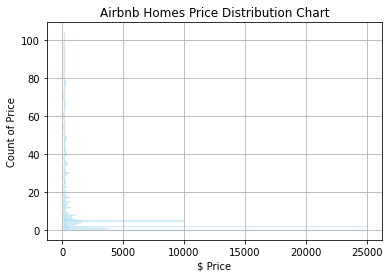

In [9]:
price_dtrb_area_plot(home_price_count_df)

The distribution chart is so strange, I choose to segment prices into several price chage. First I try $25

In [10]:
binedges = np.arange(0, 1000, 25)
binlabels = np.arange(25, 1000, 25)

# group the prices by 50 range
tmp = home_price_count_df.groupby(pd.cut(home_price_count_df.index,
                                        bins = binedges,
                                        labels = binlabels)
                                 ).sum_price_count.sum()
tmp_df = tmp.to_frame()
tmp_df.index.names = ['price_range']

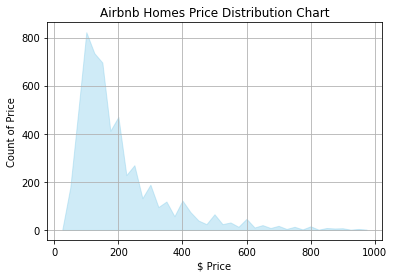

In [11]:
price_dtrb_area_plot(tmp_df)

From above chart I choose to see range betwen $0-$400 to see detail distribution. The homes out of this range will be not consideres in this research
Then, I choose to use reduce the dataset, airbnb homes with price in between $0-$400 to plot distribution chart using $10 as price range. 

In [12]:
binedges = np.arange(0, 400, 10)
binlabels = np.arange(10, 400, 10)
# temp = home_price_count_df
# max(home_price_count_df.index)
# print(Len(binedges))
# print(Len(binlabels))

# group the prices by 10 range
tmp = home_price_count_df.groupby(pd.cut(home_price_count_df.index,
                                        bins = binedges,
                                        labels = binlabels)
                                 ).sum_price_count.sum()
tmp_df = tmp.to_frame()
tmp_df.index.names = ['price_range']

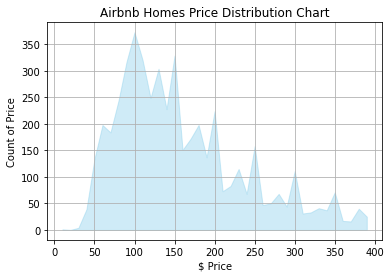

In [13]:
price_dtrb_area_plot(tmp_df)

This Chart becomes cleaarer in terms of distributuin
For this paper I choose only selected homes with price from $80-$110 to practice my model

In [14]:
homes_df.head()

,home_id,property_type,room_type,price,number_of_reviews,scores_overal_rating,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value
0,144978,Private room in rental unit,Private room,$55.00,120,4.68,4.78,4.45,4.86,4.81,4.81,4.66
1,958,Entire serviced apartment,Entire home/apt,$194.00,371,4.86,4.93,4.92,4.95,4.88,4.98,4.76
2,5858,Entire rental unit,Entire home/apt,$235.00,111,4.88,4.85,4.87,4.89,4.85,4.77,4.68
3,8142,Private room in rental unit,Private room,$56.00,9,4.67,4.44,4.44,4.78,4.78,4.67,4.67
4,8339,Entire condo,Entire home/apt,$575.00,28,4.87,4.88,5.00,4.94,5.00,4.94,4.75


In [15]:
# Select all Airbnb homes with price in 50 - 150
# data_sample1_df = homes_df[homes_df.price_int]
homes_df['price_int'] = [extract_price(p) for p in homes_df.price]

In [16]:
data_sample1_df = homes_df[homes_df['price_int'] >= 50]
data_sample1_df = data_sample1_df[data_sample1_df['price_int'] <=150]
data_sample1_df.head(3)

,home_id,property_type,room_type,price,number_of_reviews,scores_overal_rating,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value,price_int
0,144978,Private room in rental unit,Private room,$55.00,120,4.68,4.78,4.45,4.86,4.81,4.81,4.66,55
3,8142,Private room in rental unit,Private room,$56.00,9,4.67,4.44,4.44,4.78,4.78,4.67,4.67,56
5,8739,Private room in condo,Private room,$129.00,761,4.91,4.94,4.94,4.95,4.96,4.93,4.74,129


Observes those 858 homes
See the counts of different scores for each feature

In [17]:
# scores_accuracy
# scores_cleanliness
# scores_checkin
# scores_communication
# scores_Location
# scores_value
scores_accuracy = data_sample1_df.groupby('scores_accuracy')['home_id'].nunique()
scores_cleanliness = data_sample1_df.groupby('scores_cleanliness')['home_id'].nunique()
scores_checkin = data_sample1_df.groupby('scores_checkin')['home_id'].nunique()
scores_communication = data_sample1_df.groupby('scores_communication')['home_id'].nunique()
scores_location = data_sample1_df.groupby('scores_location')['home_id'].nunique()
scores_value = data_sample1_df.groupby('scores_value')['home_id'].nunique()



In [18]:
print('*' * 40)
print(scores_accuracy)
print('\n' + '*' * 40)
print(scores_cleanliness)
print('\n' + '*' * 40)
print(scores_checkin)
print('\n' + '*' * 40)
print(scores_communication)
print('\n' + '*' * 40)
print(scores_location)
print('\n' + '*' * 40)
print(scores_value)

****************************************
scores_accuracy
0.00      1
1.00     12
1.50      2
2.00      4
2.75      1
       ... 
4.96     58
4.97     61
4.98     54
4.99     30
5.00    863
Name: home_id, Length: 104, dtype: int64

****************************************
scores_cleanliness
0.00      1
1.00     10
2.00      7
2.50      3
2.67      1
       ... 
4.96     60
4.97     59
4.98     48
4.99     36
5.00    727
Name: home_id, Length: 120, dtype: int64

****************************************
scores_checkin
0.00       1
1.00       5
2.00       5
3.00       9
3.50       6
        ... 
4.96      93
4.97     101
4.98      94
4.99      79
5.00    1125
Name: home_id, Length: 80, dtype: int64

****************************************
scores_communication
1.00      13
2.00       4
2.50       1
3.00      19
3.33       3
        ... 
4.96     102
4.97     100
4.98      92
4.99      60
5.00    1106
Name: home_id, Length: 104, dtype: int64

****************************************
scores_

In [19]:
print(
    'Maximum review number: ' +
     str(max(data_sample1_df["number_of_reviews"])) +
     '\nMinimum review number: ' +
     str(min(data_sample1_df["number_of_reviews"]))
)

# data_sample1_df.groupby(
#      pd.cut(data_sample1_df["number_of_reviews"],
#             np.arange(0, 500, 20))
# ).sum()

tmp1_df = data_sample1_df.groupby(
            pd.cut(data_sample1_df["number_of_reviews"],
                   np.arange(0, 500, 20))
          )['home_id'].nunique().to_frame()

# sample1_info_df_df.columns = ['number_of_homes']
# sample1_info_df

tmp2_df = data_sample1_df.groupby(
             pd.cut(data_sample1_df["number_of_reviews"],
                   np.arange(0, 500, 20))
          )['number_of_reviews'].sum().to_frame()

sample1_info_df = pd.concat([tmp1_df, tmp2_df], axis=1)
sample1_info_df.columns = ['number_of_homes', 'total_number_of_reviews']
sample1_info_df = sample1_info_df[sample1_info_df.number_of_homes != 0]
sample1_info_df['avg_number_of_reviews'] = sample1_info_df['total_number_of_reviews']/sample1_info_df['number_of_homes']

sample1_info_df

Maximum review number: 977
Minimum review number: 1


,number_of_homes,total_number_of_reviews,avg_number_of_reviews
number_of_reviews,,,
"(0, 20]",1509,9020,5.977469
"(20, 40]",278,8138,29.273381
"(40, 60]",193,9782,50.683938
"(60, 80]",123,8691,70.658537
"(80, 100]",97,8785,90.567010
"(100, 120]",88,9797,111.329545
"(120, 140]",79,10209,129.227848
"(140, 160]",48,7135,148.645833
"(160, 180]",39,6598,169.179487


In [20]:
def bar_chart(df, col_name):
    objects = df.index
    y_pos = np.arange(len(objects))
    performance = df[col_name]
    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel(col_name)
    plt.xlabel('review_number_range')
    plt.rcParams["figure.figsize"] = [16,9]
    
    plt.show()

In [21]:
#sample1_info_df.index[0].right

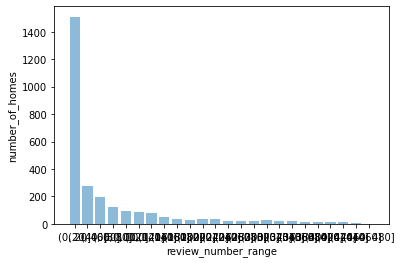

In [22]:
bar_chart(sample1_info_df, 'number_of_homes')

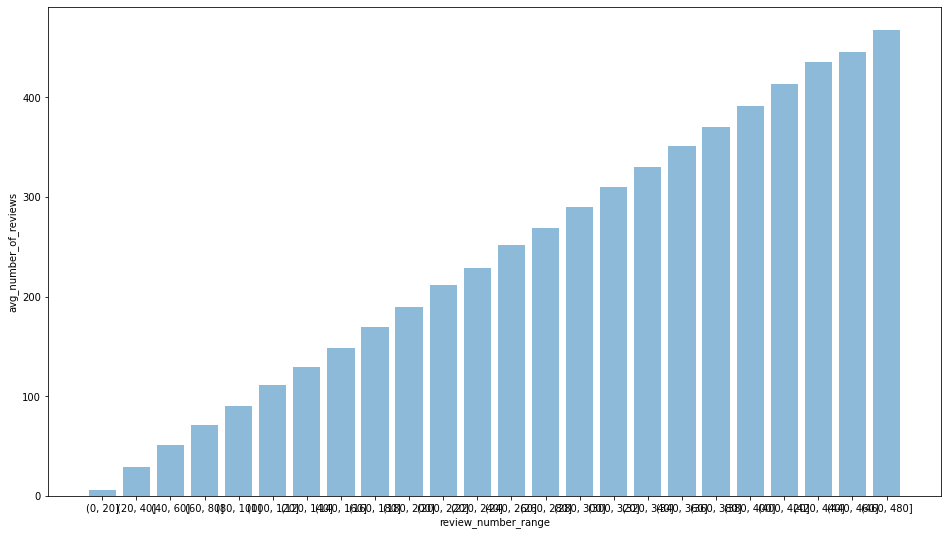

In [23]:
bar_chart(sample1_info_df, 'avg_number_of_reviews')

For this phase, I will try with homes number_of_reviewa in (60, 120 ) to see what happen. 

In [24]:
# Select data as described above
data_sample2_df = data_sample1_df[data_sample1_df['number_of_reviews'] > 60]
data_sample2_df = data_sample2_df[data_sample2_df['number_of_reviews'] <= 120]

data_sample2_df.head()

,home_id,property_type,room_type,price,number_of_reviews,scores_overal_rating,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value,price_int
0,144978,Private room in rental unit,Private room,$55.00,120,4.68,4.78,4.45,4.86,4.81,4.81,4.66,55
22,32414,Entire rental unit,Entire home/apt,$150.00,94,4.81,4.94,4.96,4.96,4.94,4.48,4.61,150
25,40092,Entire rental unit,Entire home/apt,$106.00,104,4.63,4.73,4.68,4.86,4.84,4.43,4.60,106
26,41055,Entire home,Entire home/apt,$144.00,74,4.79,4.87,4.48,4.79,4.88,4.94,4.85,144
32,51557,Entire rental unit,Entire home/apt,$125.00,109,4.89,4.90,4.86,4.98,4.99,4.87,4.79,125


In [25]:
data_sample1_df.to_csv('./sample_data_for_testing.csv')
# data_sample2_df.to_csv('./sample_data_for_testing', sep='\t', encoding='utf-8')

In [26]:
data_sample1_df

,home_id,property_type,room_type,price,number_of_reviews,scores_overal_rating,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value,price_int
0,144978,Private room in rental unit,Private room,$55.00,120,4.68,4.78,4.45,4.86,4.81,4.81,4.66,55
3,8142,Private room in rental unit,Private room,$56.00,9,4.67,4.44,4.44,4.78,4.78,4.67,4.67,56
5,8739,Private room in condo,Private room,$129.00,761,4.91,4.94,4.94,4.95,4.96,4.93,4.74,129
6,10537,Private room,Private room,$95.00,18,4.94,4.77,5.00,4.85,5.00,4.08,4.42,95
7,10578,Entire rental unit,Entire home/apt,$120.00,18,4.93,4.76,4.94,4.81,4.94,4.82,4.75,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777,438940,Private room in condo,Private room,$80.00,114,4.85,4.82,4.70,4.87,4.89,4.96,4.73,80
6778,442349,Entire rental unit,Entire home/apt,$150.00,20,4.89,5.00,4.94,4.94,5.00,5.00,4.83,150
6782,459806,Entire rental unit,Entire home/apt,$105.00,63,4.65,4.77,4.70,4.67,4.69,4.98,4.62,105
6786,470686,Private room in condo,Private room,$125.00,308,4.91,4.94,4.97,4.96,4.97,4.90,4.77,125


Until now , the data_sample2_df will be used to do further analysis of reviews

In [27]:
import re 
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns

First Step : Select Airbnb homes for research
Logic is to find the majority of all homes (80%) using normal distribution

In [28]:
fields = ['id', 'last_scraped','price','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
         'review_scores_checkin', 'review_scores_communication','review_scores_location',
         'review_scores_value','reviews_per_month']
homes_df = pd.read_csv("../input/sfo-airbnb-rika/listings.csv", encoding= "utf-8", usecols = fields)
homes_df.columns = ['home_id', 'last_scraped','price',
                   'number_of_reviews', 'scores_overal_rating','scores_accuracy',
                    'scores_cleanliness','scores_checkin','scores_communication',
                   'scores_location','scores_value','reviews_per_month']
homes_df = homes_df.dropna() #Removed 660 homes which are lack of score information
homes_df.head(3)

,home_id,last_scraped,price,number_of_reviews,scores_overal_rating,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value,reviews_per_month
0,144978,2022-12-04,$55.00,120,4.68,4.78,4.45,4.86,4.81,4.81,4.66,0.86
1,958,2022-12-04,$194.00,371,4.86,4.93,4.92,4.95,4.88,4.98,4.76,2.28
2,5858,2022-12-04,$235.00,111,4.88,4.85,4.87,4.89,4.85,4.77,4.68,0.67


In [29]:
max(homes_df.last_scraped)
min(homes_df.last_scraped)

'2022-12-04'

In [30]:
print("There are " + str(len(homes_df)) + " airbnb homes.")
print("The price ranging from $" + str(min(homes_df.price)) + " to $"
     + str(max(homes_df.price)) + ".")

There are 5541 airbnb homes.
The price ranging from $$0.00 to $$999.00.


In [31]:
# Len(homes_sample_df)
len(homes_df)

5541

In [32]:
homes_df.to_csv('./selected_data_for_research', sep='\t', encoding='utf-8')

In [33]:
import numpy as np
from scipy import stats
from scipy.stats import norm

def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

def cdf(x, mean, std):
    return stats.norm.cdf(x, loc = mean, scale =std)

In [34]:
def price_dtrb_hist_plot(homes_df, price_range):

    # Select data Frame from dataframe
    data = homes_df[homes_df.price <= price_range[1]].price
    mean, std = norm.fit(data)
    x = np.arange(price_range[0], price_range[1], 0.1)
    y = normfun(x, mean, std)
    plt.plot(x,y)
    plt.hist(data, bins=50, rwidth=0.9, density=True, alpha=0.6, color='g')
    subtitle = "Fit results: mean = %.2f, std = %.2f" % (mean, std)
    plt.suptitle('Price distribution')
    plt.title(subtitle)
    plt.xlabel('Price')
    plt.ylabel('Probability')
    plt.show()
    
    conf_interval = stats.norm.interval(0.8, loc=mean, scale=std)
    print(conf_interval)
    prob = cdf(conf_interval[1], 126, 90) - cdf(conf_interval[0], 126, 90)
    print(prob)

In [35]:
# bar chart plot function

def price_dtrb_bar_plot(df, width):
    prices =df.index
    counts =df.num_price
    
    #Make the same graph
    f, ax =plt.sublpots(figsize=(18,5))
    plt.bar(prices, counts, color="skyblue", width=width, linewidth = 1,
           edgecolor='white', align='edge', alpha=0.7)
    
    # Add titles
    plt.title("Airbnb Homes Price Disribution CHart", loc="center")
    plt.xlabel("$ Price")
    plt.ylabel("Count of Homes")
    plt.xticks(prices)
    ax.legend(fontsize = 14)
    
    plt.show()

In [36]:
home_price_count = homes_df['price'].value_counts()
home_price_count_df = DataFrame(home_price_count.values,
                               index = home_price_count.index,
                               columns = ['num_price'])
home_price_count_df.index.names = ['$price']

In [37]:
# Len(homes_sample_df)
len(homes_df)

5541

Next Step is combining selected home and the reviews

In [38]:
# Load Necessary Data : reviews
reviews_df = pd.read_csv('../input/sfo-airbnb-rika/reviews.csv', encoding="utf-8")
reviews_df.column = ['home_id','review_id', 'date', 'reviewer_id', 'reviewer_name', 'comments']
reviews_df.dropna()
reviews_df.head(2)
len(reviews_df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


330349

In [39]:
print(min(reviews_df.date), max(reviews_df.date))
# reviews_df.groupby('comments').count()
reviews_df = reviews_df[reviews_df.comments != 'The host canceled this reservation the day before arrival. This is an automated psoting.']
len(reviews_df)

2009-05-03 2022-12-03


330349

In [40]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=96e6692b7f7d8902006c21d2e519c09007f2d15e3626be812038e3be496e8804
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [41]:
from langdetect import detect
def lang_detection(series):
    isEn = []
    for text in series:
        try:
            language = detect(text)
        except:
            language = "error"
            print("This row throws and error:", text)
            
        if language == 'en':
            isEn.append(True)
        else:
            isEn.append(False)
            
    return isEn

#     return [True if detect(text) == 'en' eLse faLse for text in series]

In [42]:
lang_isen = lang_detection(reviews_df.comments)

This row throws and error: .
This row throws and error: 10/10
This row throws and error: ...
This row throws and error: :)
This row throws and error: .
This row throws and error: A＋＋＋＋＋＋＋＋＋
This row throws and error: A＋＋＋＋＋＋＋＋＋＋＋＋＋＋＋＋
This row throws and error: A＋＋＋＋＋＋＋＋＋＋＋
This row throws and error: +
This row throws and error: ?
This row throws and error: .
This row throws and error: 👍🏽
This row throws and error: 👍
This row throws and error: 👍🏻👍🏻
This row throws and error: .
This row throws and error: .
This row throws and error: .
This row throws and error: ...
This row throws and error: ​
This row throws and error: ...
This row throws and error: ..... 
This row throws and error: .
This row throws and error: :)
This row throws and error: 👍
This row throws and error: nan
This row throws and error: .
This row throws and error: ..
This row throws and error: 👍
This row throws and error: .
This row throws and error: _
This row throws and error: .
This row throws and error: 🌟
This row thr

In [43]:
reviews_df = reviews_df[lang_isen]

In [44]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,V Jillian,Holly's place was great. It was exactly what I...


In [45]:
homes_df.to_csv('./selected_data_for_research_ok.csv')

In [46]:
homes_df.to_csv('./selected_data_for_research', sep='\t', encoding='utf-8')

In [47]:
sample1_df = pd.read_csv("./selected_data_for_research_ok.csv")
sample1_df.head(5)

,Unnamed: 0,home_id,last_scraped,price,number_of_reviews,scores_overal_rating,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value,reviews_per_month
0,0,144978,2022-12-04,$55.00,120,4.68,4.78,4.45,4.86,4.81,4.81,4.66,0.86
1,1,958,2022-12-04,$194.00,371,4.86,4.93,4.92,4.95,4.88,4.98,4.76,2.28
2,2,5858,2022-12-04,$235.00,111,4.88,4.85,4.87,4.89,4.85,4.77,4.68,0.67
3,3,8142,2022-12-04,$56.00,9,4.67,4.44,4.44,4.78,4.78,4.67,4.67,0.09
4,4,8339,2022-12-04,$575.00,28,4.87,4.88,5.00,4.94,5.00,4.94,4.75,0.17
